## 岭回归算法预测房价
1. 岭回归算法相当于--带有正则化的线性回归算法,从而解决线性回归过程中易于发生过拟合的现象<br>
2. Ridge方法相当于SGDRegressor(penalty='l2', loss="squared_loss"),只不过SGDRegressor实现了一个普通的随机梯度下降学习，推荐使用Ridge(实现了SAG)
3. SAG:如果数据集、特征都比较大，内部选择该随机梯度下降优化

In [1]:
# 导包
from sklearn.datasets import load_boston  # 数据集
from sklearn.preprocessing import StandardScaler  # 标准化接口
from sklearn.model_selection import train_test_split  # 数据集分离
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression # 岭回归, Lasso回归, 逻辑回归
import pandas as pd
import numpy as np

In [2]:
# 数据处理
ld = load_boston()

x_train, x_test, y_train, y_test = train_test_split(ld.data, ld.target, test_size=0.25, random_state=1)

std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))

C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

岭回归算法预测,alpha即指定正则化的力度<br>
正则化力度的影响:
>正则化力度越大，权重系数会越小(高阶项系数趋近于零)<br>
>正则化力度越小，权重系数会越大

In [3]:
rd = Ridge(alpha=0.05)

rd.fit(x_train, y_train)

print('回归系数:\n',rd.coef_)
y_predict = rd.predict(x_test)
# 观察预测后的均方误差,与线性回归进行对比
print('岭回归的均方误差:', mean_squared_error(y_test,y_predict))
print('岭回归的实际房价均方误差:', mean_squared_error(std_y.inverse_transform(y_test),std_y.inverse_transform(y_predict)))

回归系数:
 [[-0.12019408  0.15027489  0.02932631  0.07472724 -0.28019156  0.22179958
   0.0218258  -0.35250679  0.29879635 -0.20224632 -0.23906031  0.06305591
  -0.45246484]]
岭回归的均方误差: 0.27588055100713926
岭回归的实际房价均方误差: 21.897473825960407


## Lasso回归算法预测房价

In [8]:
ls=Lasso(alpha=0.05)

ls.fit(x_train, y_train)

print('回归系数:\n',rd.coef_)

# # 预测测试集的房子价格
y_rd_predict = std_y.inverse_transform(ls.predict(x_test).reshape(-1,1))
y_predict = ls.predict(x_test)
# print("岭回归里面每个房子的预测价格：", y_rd_predict)

print('Lasso回归的均方误差:', mean_squared_error(y_test,y_predict))
print('Lasso回归的实际房价均方误差:', mean_squared_error(std_y.inverse_transform(y_test),y_rd_predict))

回归系数:
 [[-0.12019408  0.15027489  0.02932631  0.07472724 -0.28019156  0.22179958
   0.0218258  -0.35250679  0.29879635 -0.20224632 -0.23906031  0.06305591
  -0.45246484]]
Lasso回归的均方误差: 0.34915312700364426
Lasso回归的实际房价均方误差: 27.71333982009004


效果不如岭回归

## 逻辑回归算法进行分类
逻辑回归是解决二分类问题的利器!

In [9]:
"""
逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
"""
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 在线读取数据
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
    names=column)
# 查看数据内容与类型
print(data.head())
print(data.info())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1

In [11]:
# 数据中的缺失值处理
data = data.replace(to_replace='?', value=np.nan)
#直接删除，哪一行有空值，就删除对应的样本
data = data.dropna()

In [15]:
# 进行数据的分割
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25,
                                                    random_state=1)

# 进行标准化处理
std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
# 目标值是class类别列中只有值2与4,因此无需进行标准化

In [17]:
# 逻辑回归预测
# C正则化力度
lg = LogisticRegression(C=0.8, solver='newton-cg')

lg.fit(x_train, y_train)
# 逻辑回归的权重参数
print(lg.coef_)

y_predict = lg.predict(x_test)
print(y_predict)
print("准确率：", lg.score(x_test, y_test))
# print(lg.predict_proba(x_test))  #得出对应分类的概率

[[1.18314754 0.1599434  0.86017815 0.65133293 0.03074963 1.16182123
  0.84028542 0.67719977 0.75028798]]
[2 2 2 4 2 4 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 4 4 2 4 2
 2 4 4 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 4 2 4
 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 2 4
 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 4 4 2 4 2 2 2]
准确率： 0.9824561403508771


在二分类问题中,准确率不再是评估模型优劣的直接指标<br>
更多的是考虑而分类所对应的混沌矩阵所带来的的更多指标
>精确率:TP/(TP+FP)<br>
>**召回率**(医院特别看重):TP/(TP+FN)<br>
>F1-SCORE:2TP/(2TP+FP+FN)<br>
>ROC曲线<br>
>AUC指标

In [18]:
# macro avg 平均值  weighted avg 加权平均值
# support是对应的样本数
print("精确率,召回率,f1-score：\n", classification_report(y_test, y_predict, labels=[2, 4], target_names=["良性", "恶性"]))
#AUC计算要求是二分类，不需要是0和1
print("AUC指标：", roc_auc_score(y_test, y_predict))

精确率,召回率：
               precision    recall  f1-score   support

          良性       0.97      1.00      0.99       111
          恶性       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC指标： 0.975


C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


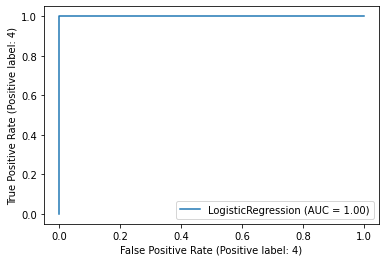

In [21]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lg, x_test,y_test)